<meta charset="utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.16.0/umd/popper.min.js"></script>

<script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js"></script>

<div class="container">
    <div class="jumbotron text-center">
        <h1>Image Classifier
    </div>
    <div class="row">
        <h2> Purpose </h2>
        <p> This notebook shows the basics of training an image classifier neural network.  Additionally, we will aslo see the affects on the performance of the network using:
        <ul>
            <li>Unscaled Data </l1>
            <li> Scaled Data </li>
            <li> Different number of hidden layers
        </ul>
    </div>

</div>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns


2025-05-04 00:48:26.354879: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-04 00:48:26.362249: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-04 00:48:26.378121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746319706.419070   16526 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746319706.427336   16526 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746319706.461217   16526 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

# Load data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## View data, its shape, size etc.

In [3]:
print(len(X_test)) # size of X_test
print(len(y_test)) # size of y_test
print(len(X_train)) # size of X_train
print(len(y_train)) # size of y_train

10000
10000
60000
60000


In [4]:
def view_image(arr, index):
    plt.matshow(arr[index])

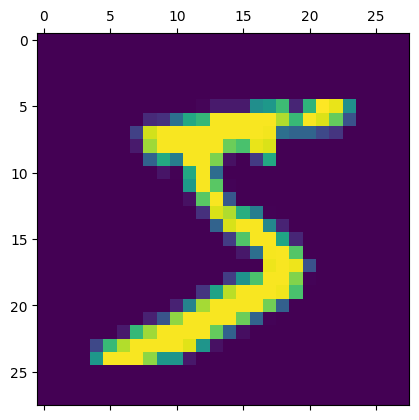

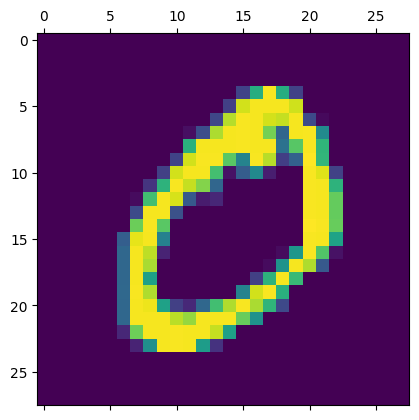

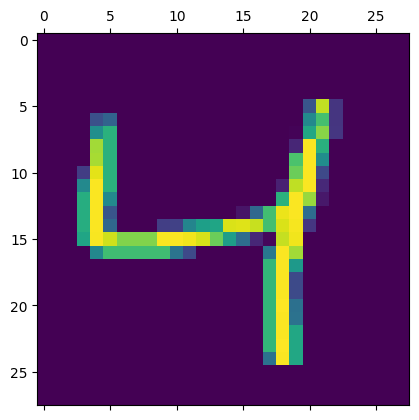

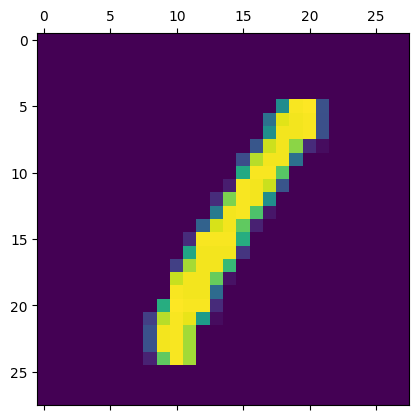

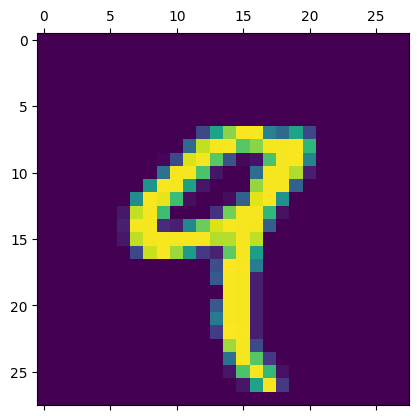

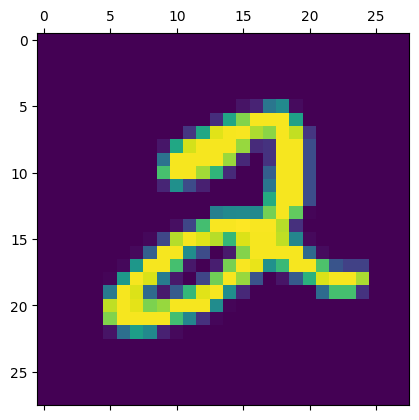

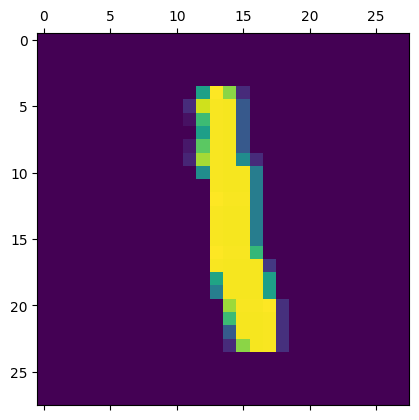

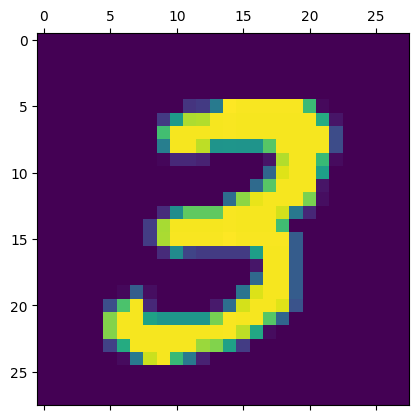

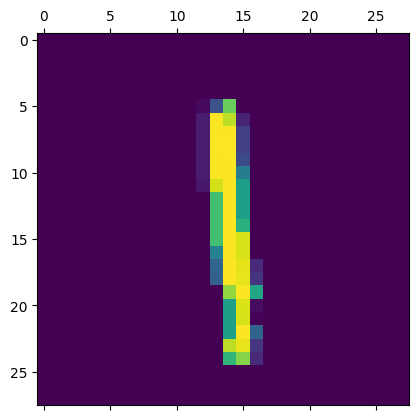

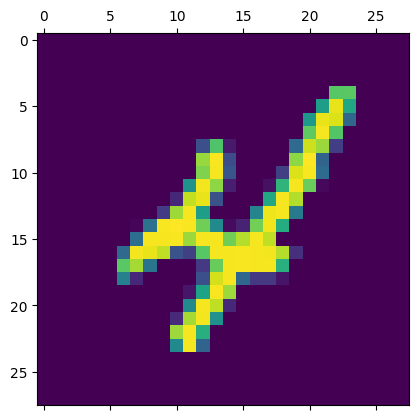

In [5]:
# view image
value_arr = [i for i in range(0,10)]

for val in value_arr:
    view_image(X_train, val)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train.reshape(len(X_train),28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784), dtype=uint8)

# Build Model

## First we buld an unscaled model to compare the affects of scaling

## Flatten the Data

## Flattening the data looks like this:
    ### say you have a grid of 28X28, instead of a grid of 28X28 it turns into a single vector of (28*28) rows X 1 column

In [10]:
def model_metrics(X_test,y_test,model):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test Loss: {test_loss}")

def eval_model(X_test,y_test,model):

    y_pred = model.predict(X_test) # make predictions
    y_pred_labels = [np.argmax(i) for i in y_pred] # store the indexes of the predictions

    # view first 5 predictions
    y_pred_labels[:5] # view the first 5 predicitons

    c_matrix_usm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels) # create confustion matrix

    plt.figure(figsize = (10,7))
    sns.heatmap(c_matrix_usm,annot=True,fmt='d')
    plt.xlabel('predicted')
    plt.ylabel('Truth')

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28) 

## First we will build an unscaled model to see how it does and compare it to a scaled model

In [12]:
unscaled_model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
unscaled_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
unscaled_model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-04 00:59:25.351699: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4631 - loss: 17.5387
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4829 - loss: 6.1005
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4588 - loss: 5.8246
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4469 - loss: 5.3993
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4371 - loss: 5.3921


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4074 - loss: 6.7233
Test Accuracy: 0.41990000009536743
Test Loss: 5.883304595947266
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.4074 - loss: 6.7233
Test Accuracy: 0.41990000009536743
Test Loss: 5.883304595947266


''

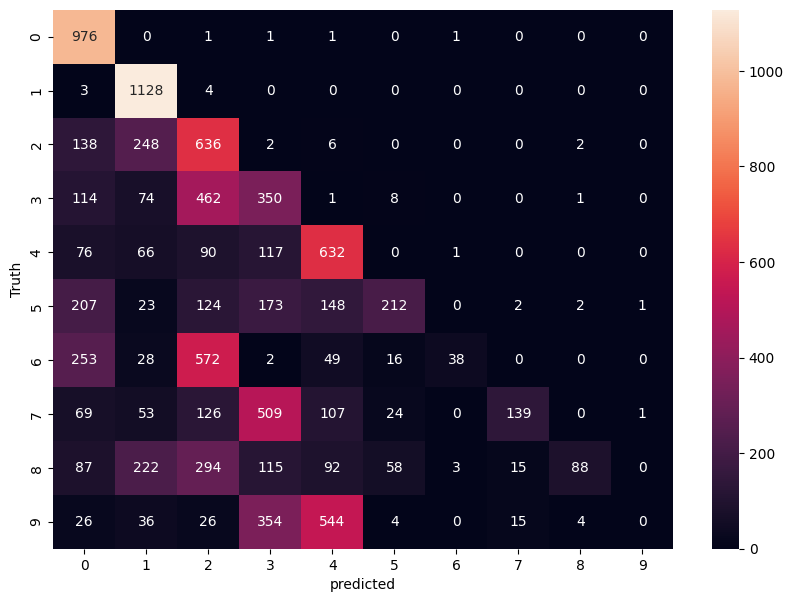

In [13]:
# view metrics
model_metrics(X_test_flattened,y_test,unscaled_model)

eval_model(X_test_flattened,y_test,unscaled_model)
''''''
test_loss_unscaled, test_accuracy_unscaled = unscaled_model.evaluate(X_test_flattened, y_test)
print(f"Test Accuracy: {test_accuracy_unscaled}")
print(f"Test Loss: {test_loss_unscaled}")
''''''

####  The unscaled model has a accuracy of 0.41

## Next we will scale our data to see how it performs

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

In [15]:
scaled_model1 = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
scaled_model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
scaled_model1.fit(X_train_scaled, y_train, epochs=5)

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2025-05-04 01:01:05.235907: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8221 - loss: 0.6396
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9173 - loss: 0.3237
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9232 - loss: 0.3014
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9258 - loss: 0.2811
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9276 - loss: 0.2675


In [17]:
# view metrics
model_metrics(X_test_scaled,y_test,scaled_model1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9108 - loss: 0.3725
Test Accuracy: 0.9200999736785889
Test Loss: 0.3622119724750519


### Create a confusion matrix to view how the model performed after scaling the data

  1/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


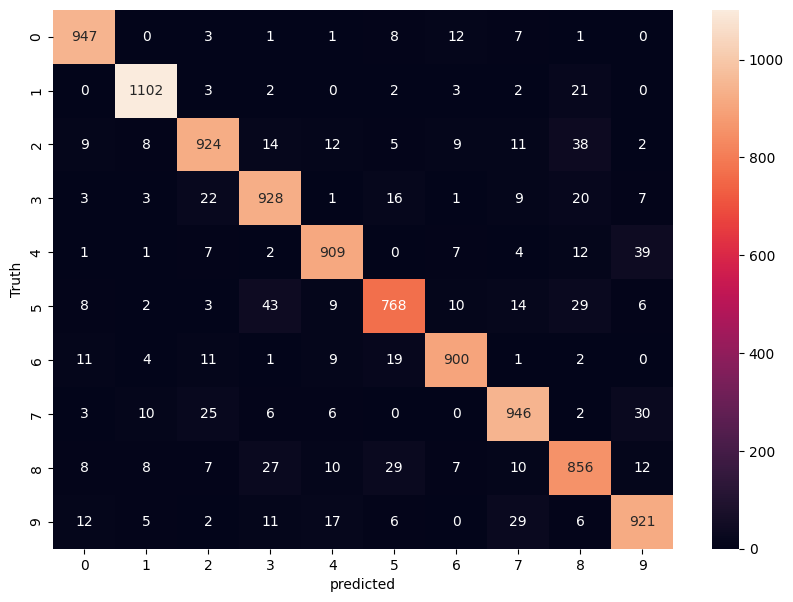

In [18]:
eval_model(X_test_scaled,y_test,scaled_model1)

In [19]:
scaled_model1.evaluate(X_test_scaled, y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9688 - loss: 0.2904

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9108 - loss: 0.3725


[0.3622119724750519, 0.9200999736785889]

## Add more hidden layers
### We will add more hidden layers to see how the model does using StandardScaler()

In [20]:
scaled_model2 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation="sigmoid")
])

scaled_model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

scaled_model2.fit(X_train_scaled, y_train, epochs=5)

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2025-05-04 01:02:32.178427: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8885 - loss: 0.3828
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9686 - loss: 0.1066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0718
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0538
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0407


In [21]:
scaled_model2.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1387


[0.13773132860660553, 0.9689000248908997]

In [22]:
model_metrics(X_test_scaled,y_test,scaled_model2)

152/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9641 - loss: 0.1329

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1387
Test Accuracy: 0.9689000248908997
Test Loss: 0.13773132860660553


  1/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


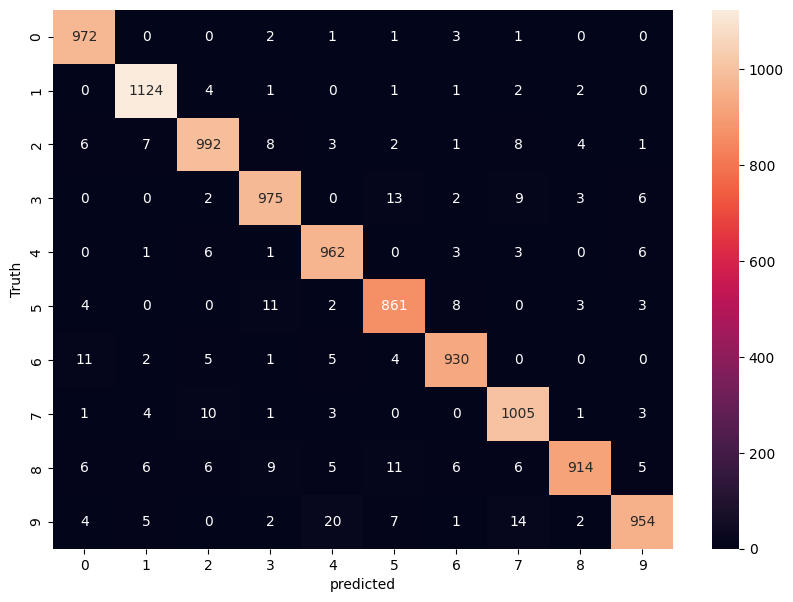

In [23]:
eval_model(X_test_scaled,y_test,scaled_model2)

<h3> Add more epochs to the scaled model that has additional layers </h3>

<p> So far we can see the difference between the scaled model and the unscaled model the difference.  The unscaled model had an accuracy of about 0.26 where the scaled model with no additonal layers had an accuracy of about 0.923. </p>
<p> From this we can see just scaling our data has tremendous performace improvement. </p>
<p> Next we added an additional layer to see what the model's performance will look like, and we can see that accuracy went up to 0.968. Again, here we can see that adding an additional layer improved performance. </p>
<p> Next we will see what the affect on the model is by <strong>increasing the number of epochs to 12</strong> </p>

In [24]:
scaled_model3 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation="sigmoid")
])
scaled_model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)
scaled_model3.fit(X_train_scaled, y_train, epochs=12)

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12


2025-05-04 01:03:40.955593: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8855 - loss: 0.4005
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.1071
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9774 - loss: 0.0739
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9831 - loss: 0.0513
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0396
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.0347
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9913 - loss: 0.0222
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0223
Epoch 9/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0164
Epoch 10/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0253
Epoch 11/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0173
Epoch 12/12
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [25]:
scaled_model3.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9438 - loss: 0.2502


[0.24571828544139862, 0.9478999972343445]

In [26]:
# model metrics
model_metrics(X_test_scaled,y_test,scaled_model3)

123/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9464 - loss: 0.2211

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9438 - loss: 0.2502
Test Accuracy: 0.9478999972343445
Test Loss: 0.24571828544139862


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


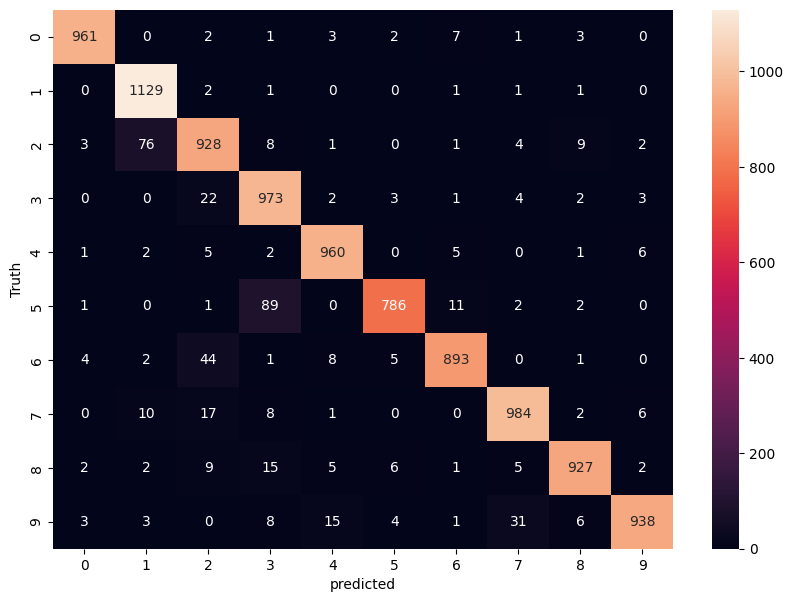

In [27]:
eval_model(X_test_scaled,y_test,scaled_model3)


In [98]:
from PIL import Image, ImageOps

In [30]:
def make_predictions(path, actual_value, _model, _scaler):
    image = Image.open(path).convert("L")  # Convert to grayscale
    image = ImageOps.invert(image)  # Invert colors if needed
    image = image.resize((28, 28))  # Resize to match MNIST
    image = np.array(image).astype(np.float32)
    image_scaled = scaler.transform(image.flatten().reshape(1, -1))
    prediction = scaled_model3.predict(image_scaled)
    #print("Prediction Probabilities:", prediction) # shows the array of values
    predicted_digit = np.argmax(prediction)
    print(f"Predicted Digit: {predicted_digit} Actual Digit {actual_value}")

In [ ]:
# example usage
file_path = "path/to/your/image"
actual_val = 7 #the digist you are trying to identify
_model = scaled_model3 # here will be the model you have trained, we trained four different models, any one of those can be passed here
# Scaler is the StandardScaler() used to scale the data
make_predictions(file_path,actual_val,_model,scaler)